#**Clusterização de clientes de cartão de crédito**

**Sobre a base de dados utilizada**

O conjunto de dados utilizado contém um resumo sobre o perfil de utilização do cartão de 9000 usuários ativos nos últimos 6 meses. A base de dados contém 18 características dos clientes. 

**Descrição das variáveis**



**CUSTID:** Identificação do titular do cartão de crédito;

**BALANCE:** Saldo da conta;

**BALANCEFREQUENCY:** Frequência de atualização do Balanço, o valor numérico varia entre 0 e 1, onde 1 significa que o balanço é atualizado com frequência e 0 indica que o balanaço não é atualizado frequentemente.

**PURCHASES:** soma dos valores comprados nos últimos 6 meses;

**ONEOFFPURCHASES:** Valores pagos a vista;

**INSTALLMENTSPURCHASES:** Valores pagos parcelados;

**CASHADVANCE:** Quantia monetária adiantada pelo usuário;

**PURCHASESFREQUENCY:** Frequência de realização de compras, escala variando entre 0 e 1, onde 1 significa comprado com frequência e 0 não comprado com frequência.

**ONEOFFPURCHASESFREQUENCY:** A frequência em que as compras são feitas de uma só vez (1 = é frequente, 0 = não é frequente);

**PURCHASESINSTALLMENTSFREQUENCY:** Frequência de realização de compras parceladas (1 = feito com frequência, 0 = não é feito com frequência);

**CASHADVANCEFREQUENCY:** Frequência de adiantamento de pagamento;

**CASHADVANCETRX:** Número de transações feitas com "Cash in Advanced"

**PURCHASESTRX:** Número de transações realizadas;

**CREDITLIMIT:** Limite do cartão de crédito do usuário;

**PAYMENTS:** Valores dos pagamentos feitos pelo usuário;

**MINIMUM_PAYMENTS:**Valor mínimo de pagamentos realizados pelo usuário;

**PRCFULLPAYMENT:** Percentual do pagamento integral pago pelo usuário

**TENURE:** Tempo que o contrato leva pra ser renovado.


Fonte da base de dados: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?resource=download

**Objetivos do trabalho:** identificar e criar agrupamentos (clusteres) de clientes similares para direcionar as estratégias de negócio da empresa.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#abrindo a base de dados em um DataFrame, temos
base_dados = pd.read_csv('CC_GENERAL.csv')

base_dados.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


#Pré-processamentos dos dados

O pré-processamento do conjunto de dados tem o objetivo de limpar o dataset e organizar os dados antes do processo de clustering, evitando problemas relacionados. O pré-processamento consiste em remoção de colunas que agregam pouco ao processo; eliminação de valores faltantes.

In [ ]:
#informações sobre o dataset:
base_dados.shape

(8950, 18)

Temos dados de 8950 clientes, cada cliente contém 18 atributos.

In [ ]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Primeiramente, devemos eliminar os atributos que não vou contribuir para o processo de clusterização. Como exemplo temos a identificação do cliente. Além disso, temos a coluna 'TENURE' que representa o tempo que o contrato leva pra ser renovado, tal informação é irrelevante para o processo de clusterização dos dados. Removendo as duas colunas, temos:

In [ ]:
base_dados.drop(columns = ['CUST_ID','TENURE'], inplace = True)
base_dados.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000


Identificando os valores faltantes na base de dados, temos:

In [ ]:
#soma dos valores faltantes em cada coluna
base_dados.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

Como podemos ver, na coluna 'MINIMUM_PAYMENTS' e 'CREDIT_LIMIT' estão faltando dados. Uma forma de resolver o problema de dados faltantes é preenchê-los com a mediana da coluna. A mediana dos valores é apenas um valor aproximado do que seria o valor real, de modo a não perdemos informações sobre os clientes com valores não fornecidos.

In [ ]:
#Resumo estatístico da coluna 'MINIMUM_PAYMENTS'
base_dados['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [ ]:
#Resumo estatístico da coluna 'CREDIT_LIMIT'
base_dados['CREDIT_LIMIT'].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [ ]:
#preenchendo os valores faltantes com a mediana da respectiva coluna, temos:
base_dados.fillna(base_dados.median(), inplace = True)

In [ ]:
#Mediana da coluna 'MINIMUM_PAYMENTS'
base_dados['MINIMUM_PAYMENTS'].median()

312.343947

In [ ]:
#Mediana da coluna 'CREDIT_LIMIT'
base_dados['CREDIT_LIMIT'].median()

3000.0

Verificando se ainda existem valores faltantes, temos:

In [ ]:
base_dados.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

Após a remoção dos dados faltantes, a próxima etapa é a normalização dos dados.

In [ ]:
base_dados.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000


Como podemos ver a partir do resumo estatístico para cada variável, cada atributo possui escala diferente, com grande variabilidade entre os valores dos dados. Para trabalharmos com modelos de máquina de aprendizado e modelos de clusterização, é necessário normalizar os dados para colocá-los na mesma escala numérica.

Normalizando os dados, temos:

In [ ]:
from sklearn.preprocessing import Normalizer

base_dados_normalizada = Normalizer().fit_transform(base_dados)

base_dados_normalizada

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

Nesse caso, utilizamos a ferramenta Normalizer para realizar a normalização dos dados. No entanto, outras ferramentas poderiam ser utilizadas para realizar a mesma tarefa.

#Clusterizando com KMeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#instanciando o objeto clustere KMeans, temos:
kmeans = KMeans(n_clusters = 5, n_init = 10, max_iter = 300)

#Clusterizando, temos:
y_pred = kmeans.fit_predict(base_dados_normalizada)

#armazenando os labels dos clústeres gerados
labels = kmeans.labels_

In [ ]:
labels

array([3, 1, 3, ..., 3, 3, 0], dtype=int32)

In [ ]:
y_pred

array([3, 1, 3, ..., 3, 3, 0], dtype=int32)

Observe que a variável 'y_pred' e 'labels' armazenam os mesmos valores. Na prática o método '.fit_predict' aplica os dados na clusterização e armazena as labels na variável y_pred'. Também podemos acessar as labels através do método '.labels_'

Após a clusterização, com os parâmetros pré-especificados, devemos validar a clusterização realizada. Caso a clusterização não seja validada, não prosseguimos para a etapa de interpretação dos clusteres criados.

#Validação da clusterização

As métricas de validação podem ser de dois tipos: externas e internas.

Para a validação externa, é necessário conhecermos os labels. Como não temos os labels, podemos usar as métricas de validação interna.

A validação interna usa os seguintes critérios:

**Compactação:** avalia quão próximos estão os pontos em um mesmo cluster;

**Separação:** avalia quão bem separados estão os pontos em clusters diferentes;

O coeficiente de Silhoutte é uma métrica de validação de clusteres muito utilizado. Tal coeficiente varia entre -1 e 1. Valores positivos estão associados a bons processos de clusterização.

**Calculando o coeficiente de Silhouette, temos:**

Em todos os métodos de validação abaixo, devemos fornecer os dados normalizados e o array contendo as labels dos clusteres criados.

In [ ]:
from sklearn.metrics import silhouette_score

#calculando a média dos coeficientes de silhouette
coef_silhouette = silhouette_score(base_dados_normalizada, labels, metric = 'euclidean')

print(coef_silhouette)

0.3644635747161945


O valor de coeficiente de 0,36 pode ser considerado um valor bom. Na utilização do Silhouette score, quanto mais próximo de 1 melhor será a clusterização.

Importante destacar que o índice de Silhouette é a métrica de validação mais utilizada e deve ser tomada como a métrica principal.

**Calculando o Davies-Bouldin, temos:**

In [ ]:
from sklearn.metrics import davies_bouldin_score
dbs = davies_bouldin_score(base_dados_normalizada, labels)
dbs

1.0758620069408935

Na utilização do índice de Davies-Bouldin, quanto mais próximo de 1 melhor será a clusterização.

**Calculando o Calinski, temos:**

In [ ]:
from sklearn.metrics import calinski_harabasz_score

calinski = calinski_harabasz_score(base_dados_normalizada, labels)

calinski

3431.7956206905988

Na utilização do índice de Calisnki, quanto maior for o valor do índice, melhor será a clusterização.

#Validação relativa

Como vimos na etapa de validação, cada métrica de validação fornece um valor para um determinado índice, mas como validar a partir desses valores? Vimos que para o coeficiente de Silhouette, quanto mais próximo de 1 melhor seria a clusterização, mas 0,36 está próximo de 1 ou longe? Quão boa são as clusterizações?

Na validação relativa vamos comparar as principais métricas para diferentes condições de clusterização. No caso do KMeans, vamos variar o número de clusteres, mas podemos variar também outros parâmetros. Tal metodologia busca encontrar a melhor clusterização dentre as várias que podem ser obtidas.

Encontrando a melhor clusterização, temos:

In [ ]:
#criando uma função para cálculo dos parâmetros de validação, temos:

def clustering_algorithm(n_clusters, dados_normalizados, metrica_return):

  #clusterizando
  clustering_kmeans = KMeans(n_clusters, n_init = 10, max_iter = 300)

  labels = clustering_kmeans.fit_predict(dados_normalizados)

  #aplicando as principais métricas de validação

  if metrica_return == 'coef_silhouette':
    metrica = silhouette_score(dados_normalizados, labels, metric = 'euclidean')

  elif metrica_return == 'coef_davies':
    metrica = davies_bouldin_score(dados_normalizados, labels)

  elif metrica_return == 'coef_calinski':
    metrica = calinski_harabasz_score(dados_normalizados, labels)
  else:
    return print('ERRO')

  return metrica

Criando uma função para o cálculo das principais métricas e geração de visualização gráfica

In [ ]:
def better_clustering(n_inf, n_sup, passo, dados_normalizados, metrica_return):

  #importando biblioteca para visualização gráfica
  import plotly.graph_objects as go

  #valor_metrica armazena o valor da métrica para cada n_clusters
  valor_metrica = []

  numero_clusteres = [i for i in range(n_inf,n_sup,passo)]

  for n_clusters in numero_clusteres:
    valor_metrica.append(clustering_algorithm(n_clusters, dados_normalizados, metrica_return))
  
  #gerando uma visualização gráfica para determinação visual do melhor n_clusters do KMeans

  fig = go.Figure()

  fig.add_trace(go.Scatter(x = numero_clusteres,
                           y = valor_metrica))
  if metrica_return == 'coef_silhouette':
    fig.update_layout(title = 'Coeficiente de silhouette',
                      xaxis_title = 'Número de clusteres',
                      yaxis_title = 'valores de coeficiente de silhouette')
  
  elif metrica_return == 'coef_davies':
    fig.update_layout(title = 'Coeficiente de Davies-Bouldin',
                      xaxis_title = 'Número de clusteres',
                      yaxis_title = 'valores de coeficiente de Davies-Bouldin')
  
  elif metrica_return == 'coef_calinski':
    fig.update_layout(title = 'Coeficiente de Calinski',
                      xaxis_title = 'Número de clusteres',
                      yaxis_title = 'valores de coeficiente de Calinski')
  else:
    print('ERRO')
  
  fig.show()

#Determinando o melhor número de agrupamentos (n_clusters) para o KMeans usando a validação relativa

Determinando o melhor n_clusters, temos:

Avaliando para faixa de 2-30 clusteres utilizando o coeficiente de Silhouette, temos:

In [ ]:
#Valor mínimo de número de clusteres
n_inf = 2

#Valor máximo de número de clusteres
n_sup = 30

#passo
passo = 1

#conjunto de dados normalizados
dados_normalizados = base_dados_normalizada

#Métrica adotada para validação
metrica_return = 'coef_silhouette'

better_clustering(n_inf, n_sup, passo, dados_normalizados, metrica_return)

**Conclusão:**

Utilizando o coeficiente de Silhouette, a melhor clusterização dos dados é obtida com 5-6 agrupamentos. Uma vez que para esses valores foram encontrados os índices mais próximos de 1 (lembrando que o coeficiente de Silhouette varia entre -1 e 1, com valores positivos indicando bons resultados).

Avalianda para a faixa de 2-30 clusteres utilizando o índice de Davies-Bouldin, temos:

In [ ]:
#Valor mínimo de número de clusteres
n_inf = 2

#Valor máximo de número de clusteres
n_sup = 30

#passo
passo = 1

#conjunto de dados normalizados
dados_normalizados = base_dados_normalizada

#Métrica adotada para validação
metrica_return = 'coef_davies'

better_clustering(n_inf, n_sup, passo, dados_normalizados, metrica_return)

**Conclusão:**

Utilizando o índice de Davies-Bouldin, o melhor resultado (valor mais próximo de 0) foi obtido utilizando-se 6 grupos de clusteres.

Avalianda para a faixa de 2-30 clusteres utilizando o índice de Calinski, temos:

In [ ]:
#Valor mínimo de número de clusteres
n_inf = 2

#Valor máximo de número de clusteres
n_sup = 30

#passo
passo = 1

#conjunto de dados normalizados
dados_normalizados = base_dados_normalizada

#Métrica adotada para validação
metrica_return = 'coef_calinski'

better_clustering(n_inf, n_sup, passo, dados_normalizados, metrica_return)

**Conclusão:**

Utilizando o coeficiente de Calinski, os melhores resultados foram obtidos para n_clusters = 3, 4 e 6, com valores muitos próximos entre si. Lembrando que para essa técnica de validação, quanto maior o valor do coeficiente melhor será a clusterização.

Portanto, utilizando as três técnicas, o melhor resultado seria obtido com 6 agrupamentos de clusteres. No presente trabalho foram mantidas os demais parâmetros constantes, variando apenas o número de clusteres.

#Estrutura dos clusters

Outra metodologia adotada para validação é a utilização da clusterização em conjuntos de dados aleatórios e geração de métricas de validação. Tais métricas obtidas para o conjunto de dados aleatórios são utilizadas para a comparação com as obtidas para o conjunto de dados verdadeiro. Com essa comparação somos capazes de avaliar se o conjunto de dados verdadeiros apresenta uma estrutura capaz de ser clusterizada, ou seja, apresenta subconjuntos com similaridade entre si.

Para essa tarefa, será gerado um conjunto de dados uniforme com dados aleatórios entre 0 e 1. Tal faixa foi escolhida pois está na mesma escala dos dados verdadeiros. Os dados verdadeiros foram previamente normalizados para ficar na escala entre 0 e 1.

Na criação do conjunto de dados aleatórios, serão utilizadas as mesmas quantidades de variáveis (atributos) e a mesma quantidade de instâncias (exemplos), que nesse caso são 8950 instâncias. 

Criando função para comparar os resultados de clusterização para um conjunto de dados verdadeiros e os obtidos para um conjunto aleatório com o mesmo número de instâncias e atributos.

In [ ]:
def analysis_structure(n_inf,
                      n_sup,
                      passo,
                      dados_normalizados,
                      metrica_return):

  #importando biblioteca para visualização gráfica
  import matplotlib.pyplot as plt
  import numpy as np

  #criando a variável para o conjunto verdadeiro e aleatório

  dados_normalizados_true = dados_normalizados
  
  dados_normalizados_random = np.random.rand(dados_normalizados.shape[0], dados_normalizados.shape[1])

  #valor_metrica armazena o valor da métrica para cada n_clusters
  valor_metrica_true = []
  valor_metrica_random = []  

  numero_clusteres = [i for i in range(n_inf,n_sup,passo)]

  for n_clusters in numero_clusteres:
    valor_metrica_true.append(clustering_algorithm(n_clusters, dados_normalizados_true, metrica_return))
    valor_metrica_random.append(clustering_algorithm(n_clusters, dados_normalizados_random, metrica_return))
  
  #gerando uma visualização gráfica para determinação visual do melhor n_clusters do KMeans

  fig, graf1 = plt.subplots()
  #subplot das métricas para o conjunto verdadeiro
  graf1.plot(numero_clusteres,valor_metrica_true,label='Dados verdadeiros')
  graf1.plot(numero_clusteres,valor_metrica_random,label='Dados randômicos')
  graf1.set_xlabel('Número de clusteres')

  if metrica_return == 'coef_silhouette':

    graf1.set_ylabel('Coeficiente de Silhouette')
    graf1.set_title('Avaliação do Coeficiente de Silhouette')

  elif metrica_return == 'coef_davies':

    graf1.set_ylabel('Coeficiente de Davies-Bouldin')
    graf1.set_title('Avaliação do Coeficiente de Davies-Bouldin')
  
  elif metrica_return == 'coef_calinski':

    graf1.set_ylabel('Coeficiente de Calinski')
    graf1.set_title('Avaliação do Coeficiente de Calinski')
  
  else:
    print('ERRO')
  
  plt.figure(figsize = (14,10))

  graf1.legend()

Avaliando as métricas para o conjunto de dados verdadeiros e dados randômicos, temos:

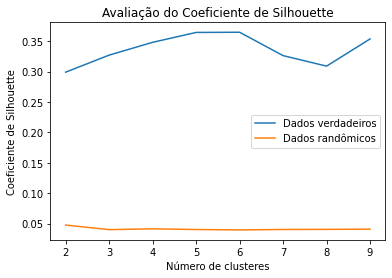

<Figure size 1008x720 with 0 Axes>

In [ ]:
#Valor mínimo de número de clusteres
n_inf = 2

#Valor máximo de número de clusteres
n_sup = 10

#passo
passo = 1

#conjunto de dados normalizados verdadeiros
dados_normalizados = base_dados_normalizada

#Métrica adotada para validação
metrica_return = 'coef_silhouette'

analysis_structure(n_inf,n_sup,passo,dados_normalizados,metrica_return)

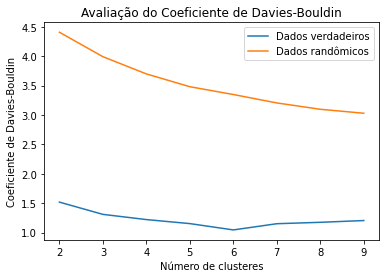

<Figure size 1008x720 with 0 Axes>

In [ ]:
#Métrica adotada para validação
metrica_return = 'coef_davies'

analysis_structure(n_inf,n_sup,passo,dados_normalizados,metrica_return)

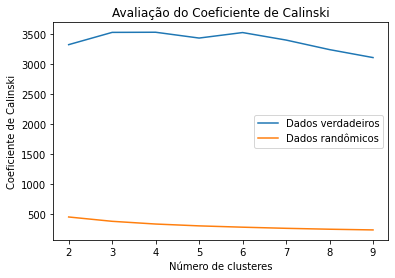

<Figure size 1008x720 with 0 Axes>

In [ ]:
#Métrica adotada para validação
metrica_return = 'coef_calinski'

analysis_structure(n_inf,n_sup,passo,dados_normalizados,metrica_return)

#Conclusão validação

A partir da comparação dos valores de métricas de validação para um conjunto aleatório, com o mesmo número de instâncias e atributos, demonstra que o conjunto de dados verdadeiros pode ser clusterizado e fornece uma comparação dos resultados com um conjunto aleatório, sem nenhum padrão de similaridade.

#Verificando a estabilidade dos clusters

Para verificar a estabilidade dos clusters, é necessário dividir o conjunto de dados em subconjuntos iguais. Em seguida, realizamos a clusterização para cada subconjunto. Para uma clusterização estável esperamos que as métricas de validação (Silhouette, calinski, David-Bouldin) apresentem valores próximos para os diferentes segmentos de dados.

In [ ]:
type(base_dados_normalizada)

numpy.ndarray

In [ ]:
#dividindo o conjunto de dados normalizados em subconjuntos

data1, data2, data3 = np.array_split(base_dados_normalizada, 3)

In [ ]:
#clusterizando o subconjunto 1
metrica_return = 'coef_silhouette'
resultados = []
n_clusters = 6
dados_normalizados = data1
resultados.append(clustering_algorithm(n_clusters, dados_normalizados, metrica_return))

#clusterizando o subconjunto 2
dados_normalizados = data2
resultados.append(clustering_algorithm(n_clusters, dados_normalizados, metrica_return))

#clusterizando o subconjunto 3
dados_normalizados = data3
resultados.append(clustering_algorithm(n_clusters, dados_normalizados, metrica_return))

print('Resultados para o {}: {}'.format(metrica_return, resultados))

Resultados para o coef_silhouette: [0.3642158840603263, 0.3646959701027845, 0.3725883746955596]


In [ ]:
#clusterizando o subconjunto 1
metrica_return = 'coef_davies'
resultados = []
n_clusters = 6
dados_normalizados = data1
resultados.append(clustering_algorithm(n_clusters, dados_normalizados, metrica_return))

#clusterizando o subconjunto 2
dados_normalizados = data2
resultados.append(clustering_algorithm(n_clusters, dados_normalizados, metrica_return))

#clusterizando o subconjunto 3
dados_normalizados = data3
resultados.append(clustering_algorithm(n_clusters, dados_normalizados, metrica_return))

print('Resultados para o {}: {}'.format(metrica_return, resultados))

Resultados para o coef_davies: [1.0227242819024263, 1.0643829191301932, 1.0415357242295302]


In [ ]:
#clusterizando o subconjunto 1
metrica_return = 'coef_calinski'
resultados = []
n_clusters = 6
dados_normalizados = data1
resultados.append(clustering_algorithm(n_clusters, dados_normalizados, metrica_return))

#clusterizando o subconjunto 2
dados_normalizados = data2
resultados.append(clustering_algorithm(n_clusters, dados_normalizados, metrica_return))

#clusterizando o subconjunto 3
dados_normalizados = data3
resultados.append(clustering_algorithm(n_clusters, dados_normalizados, metrica_return))

print('Resultados para o {}: {}'.format(metrica_return, resultados))

Resultados para o coef_calinski: [1192.383471141147, 1169.4855822391246, 1184.7944767274792]


Comos os resultados de métricas de validação apresentaram valores numéricos similares para os diferentes conjuntos de dados, podemos concluir que a clusterização realizada no conjunto de dados verdadeiros é estável.

#Visualizando gráficos de clusterização em duas dimensões (2 atributos)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#Clusterizando, temos:
clustering_kmeans = KMeans(n_clusters = 5, n_init = 10, max_iter = 300)

labels = clustering_kmeans.fit_predict(base_dados_normalizada)

In [ ]:
base_dados.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


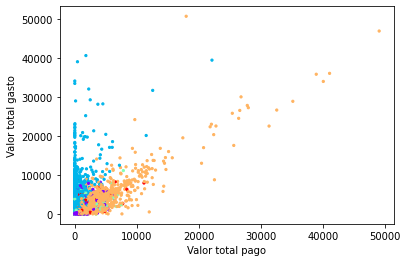

In [ ]:
#gerando a visualização gráfica
plt.scatter(x = base_dados['PURCHASES'], y = base_dados['PAYMENTS'], c = labels, s = 5, cmap = 'rainbow')

#modificando as legendas dos eixos
plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto')

plt.show()

**Interpretação do gráfico**

No gráfico podemos visualizar dois clusteres principais: verde claro e azul claro.

O verde claro representa o grupo de pessoas que utilizaram o cartão de crédito (gastaram) mas não pagaram a fatura. Note que o crescimento do valor gasto não está acompanhando o valor total pago, indicando que a fatura não foi paga.

O azul claro, por outro lado, representa o grupo de pessoas que utilizaram o cartão de crédito e pagaram a fatura, ou pelo menos uma parte da fatura. Pois, conforme o valor gasto vai aumentando, há uma tendência de crescimento do valor total pago.

Podemos visualizar todos os atributos par a par utilizando a seguinte metodologia:

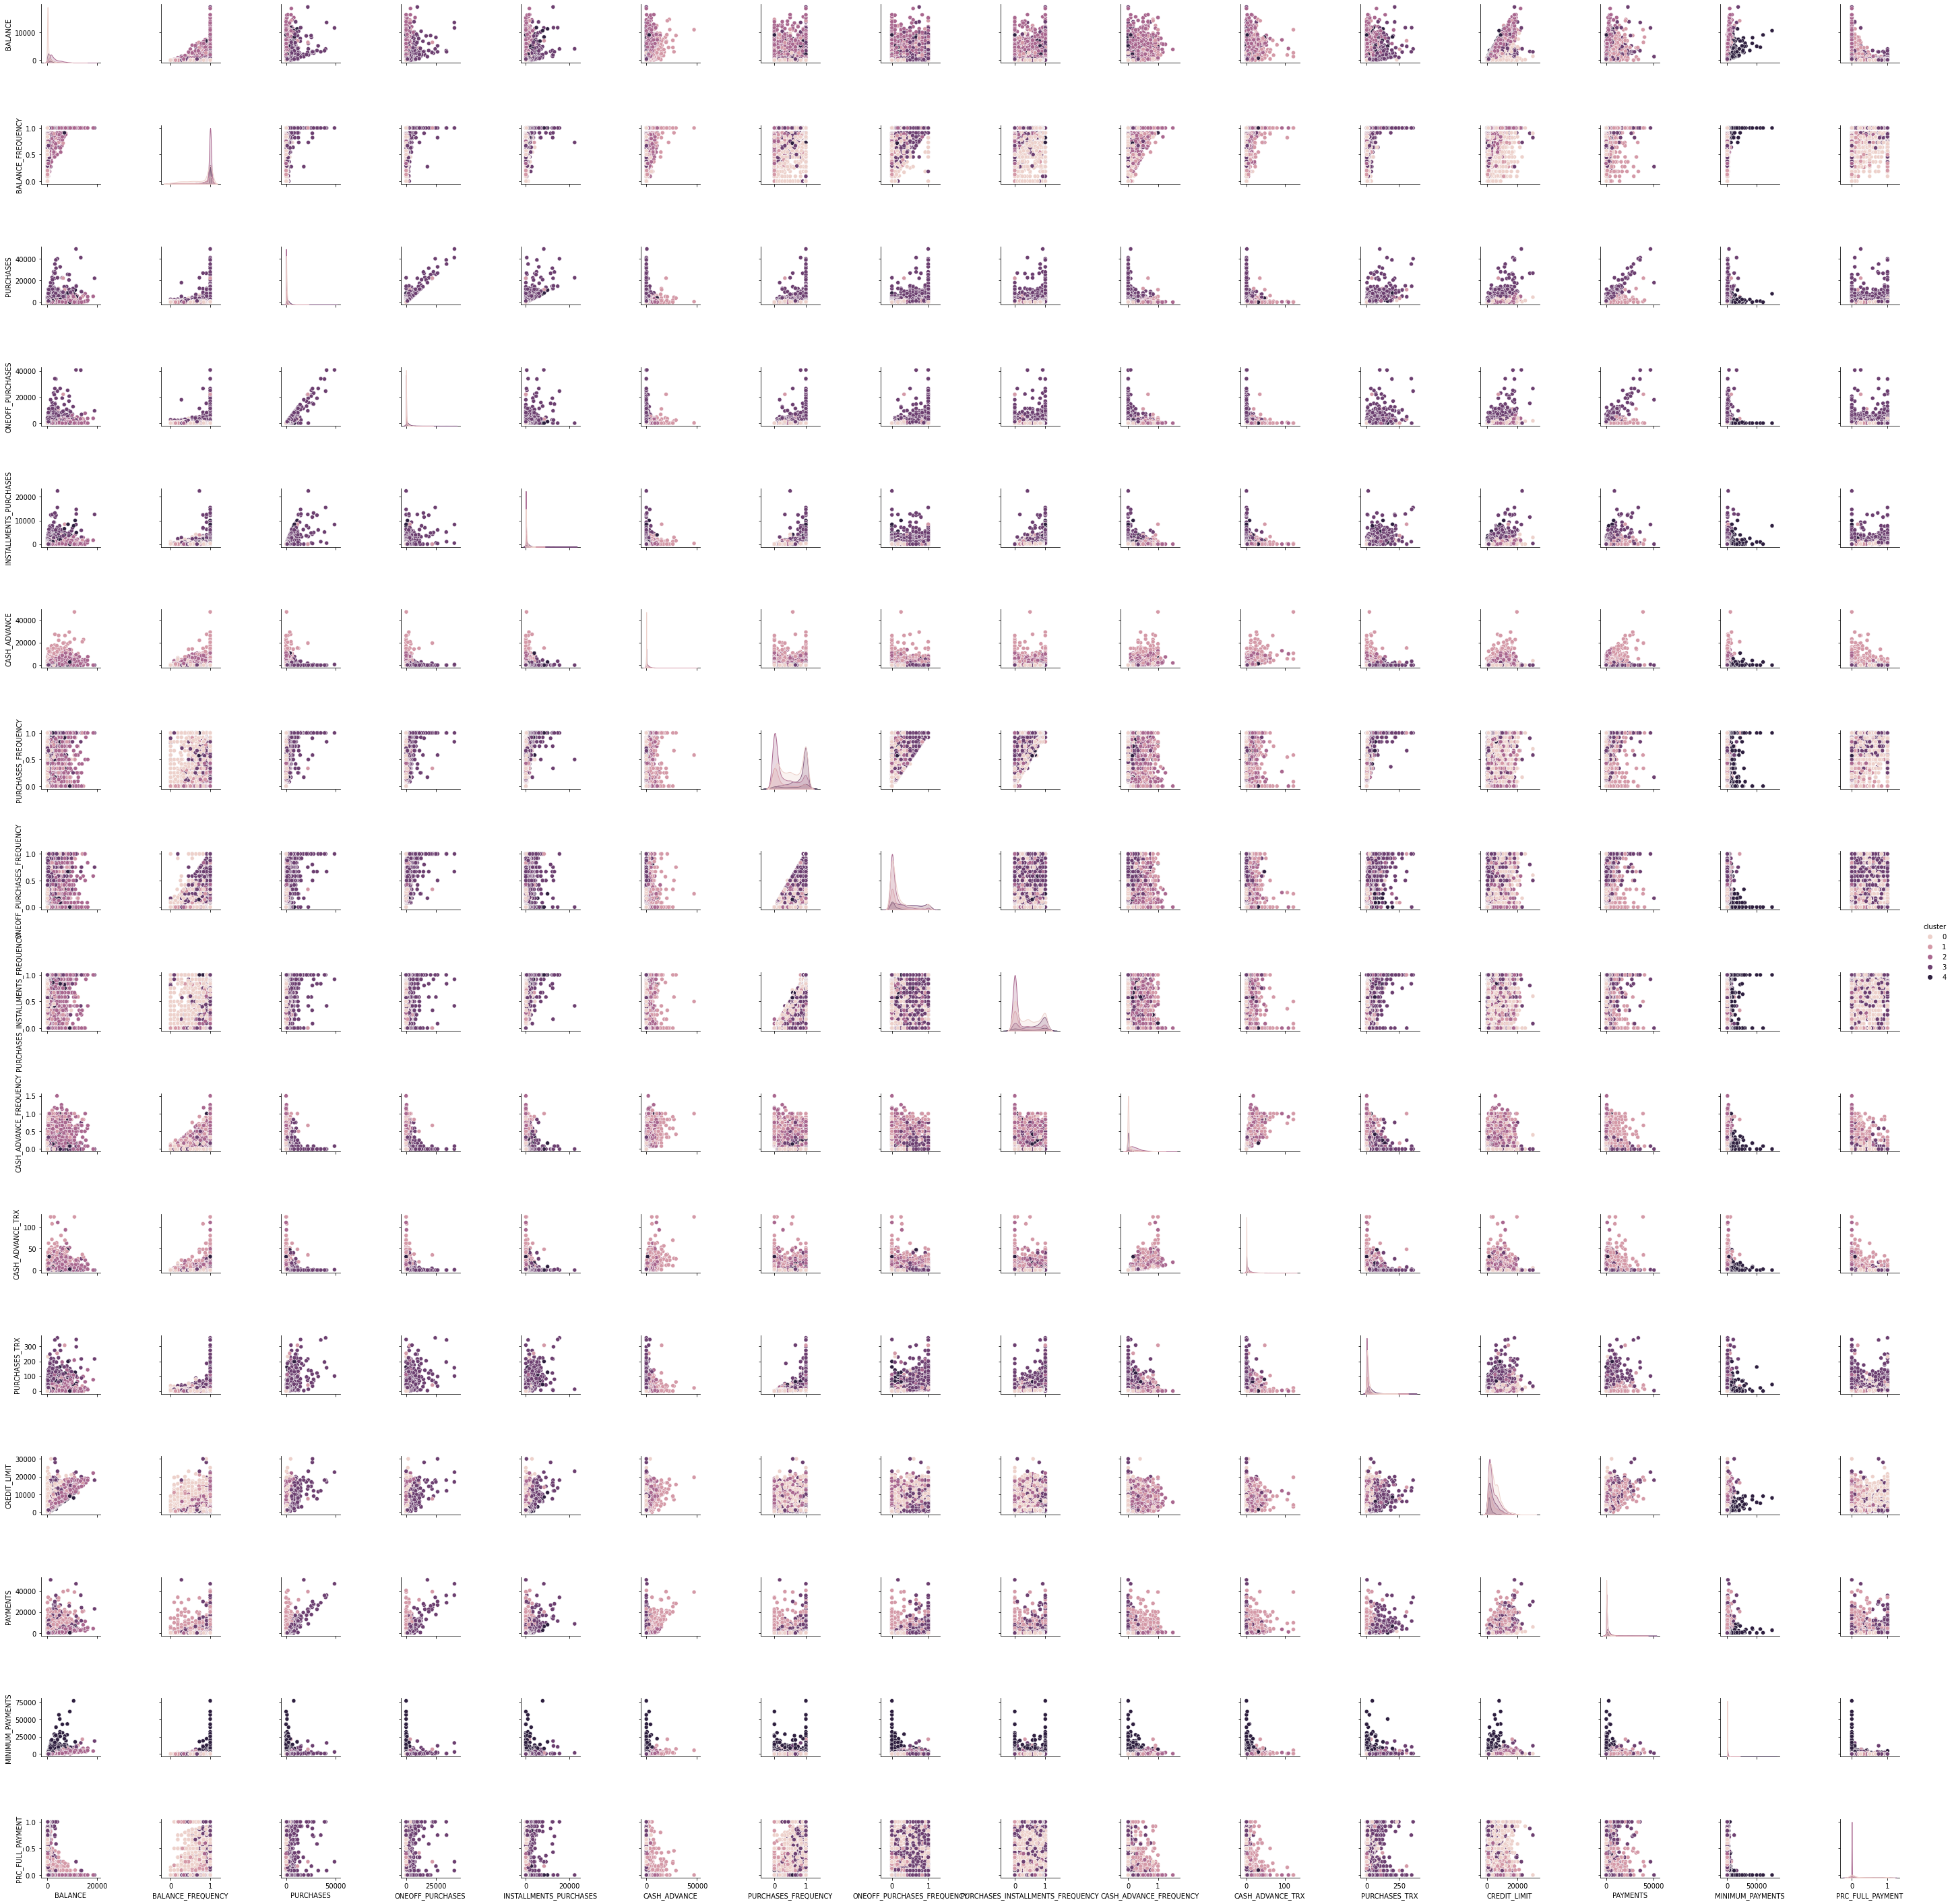

In [ ]:
import seaborn as sns

base_dados['cluster'] = labels

sns.pairplot(base_dados[0:], hue = 'cluster')

**Conclusão**

Como podemos ver, a interpretação das clusterização por gráficos não é muito útil quando são temos conjuntos com alta dimensionalidade, uma vez que são gerados muitos gráficos. Outras ferramentas podem ser utilizadas para guiar a interpretação dos resultados de clusterização.

#Descrevendo os atributos

Uma forma melhor de obter informações sobre cada cluster é a partir do resumo estatístico de cada agrupamento.

In [ ]:
base_dados.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,2


In [ ]:
base_dados.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        3278.0   443.992358   846.597972   0.000000    23.315538   
1        1073.0  1794.764536  1982.173844   0.000000   507.076999   
2        2648.0  3038.132314  2479.290949   6.824905  1256.126442   
3        1540.0  1142.222657  1664.035755   0.000000   211.566656   
4         411.0  1987.501586  1854.459156  70.794108  1018.958891   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          82.992153   411.193793   9630.367575            3278.0  0.774417   
1        1088.056301  2315.003636  14581.459140            1073.0  0.862156   
2        2173.994774  4224.605542  18495.558550            2648.0  0.963768   
3         554.332740  1370.859355  19043.138560            1540.0  0.928053   
4        1337.287314  2138.678431  11670.179850             411.0  0.989486   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       248.800040   4483.503862           3278.0  0.246549   
1        ...       886.322345  21235.065300           1073.0  0.117275   
2        ...      1330.437428   8345.641905           2648.0  0.001800   
3        ...       524.184580  18621.013310           1540.0  0.278582   
4        ...      7112.618584  76406.207520            411.0  0.019318   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.346601  0.0  0.0  0.000000  0.444444  1.0  
1        0.186801  0.0  0.0  0.083333  0.142857  1.0  
2        0.023264  0.0  0.0  0.000000  0.000000  0.6  
3        0.367203  0.0  0.0  0.083333  0.545455  1.0  
4        0.090901  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

Agora temos um DataFrame contendo as informações estatísticas sobre todos os atributos da base de dados. Podemos visualizar os resumos estatísticos para cada atributo da seguinte forma:

In [ ]:
#Criando o dataframe e visualizando as informações de saldo na conta para cada cluster.

agrupamento = base_dados.groupby('cluster').describe()
agrupamento['BALANCE']

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3278.0,443.992358,846.597972,0.000000,23.315538,82.992153,411.193793,9630.367575
1,1073.0,1794.764536,1982.173844,0.000000,507.076999,1088.056301,2315.003636,14581.459140
2,2648.0,3038.132314,2479.290949,6.824905,1256.126442,2173.994774,4224.605542,18495.558550
3,1540.0,1142.222657,1664.035755,0.000000,211.566656,554.332740,1370.859355,19043.138560
4,411.0,1987.501586,1854.459156,70.794108,1018.958891,1337.287314,2138.678431,11670.179850


In [ ]:
base_dados.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'cluster'],
      dtype='object')

In [ ]:
agrupamento['PURCHASES']

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3278.0,629.345171,759.240699,0.00,133.0000,363.615,834.9775,6407.67
1,1073.0,475.785508,1190.015344,0.00,0.0000,36.790,500.0000,22101.78
2,2648.0,385.096760,776.859083,0.00,0.0000,61.420,435.0100,7823.74
3,1540.0,3268.886929,4073.915863,100.98,1146.1425,2139.650,3868.0925,49039.57
4,411.0,854.865815,1233.968491,0.00,150.0000,498.960,1047.1200,11147.33


Podemos extrair informações sobre cada cluster a partir da obtenção dos resumos estatísticos. No entanto, temos muitos atributos e muitas informações para serem analisadas. Para melhorar a análise, vamos selecionar apenas alguns atributos para obtenção de informações sobre o argupamento.

#Escolhendo os melhores atributos para extrair informações sobre o comportamento dos diferentes clusteres.

Podemos selecionar apenas alguns atributos para extração de padrões de cada cluster. Para selecionar os atributos mais representativos podemos utilizar os centróides para cada atributo e em cada cluster.

Em seguida, coletamos o conjunto de centróides para cada atributo e fazemos a análise de variância. Vamos escolher os atributos cuja variância entre os clusteres seja diferente, uma vez que tais atributos podem revelar mais sobre as diferenças entre os agrupamentos.

A variância é uma medida estatística que nos dá informações sobre a dispersão entre os dados de um mesmo conjunto em relação a média. Quanto maior a variância, mais longe os dados estão da média.

In [ ]:
#coletando os centroides dos clusteres criados

centroids = kmeans.cluster_centers_
centroids

array([[1.59699490e-01, 2.45649360e-04, 4.38116859e-01, 2.56325660e-01,
        1.81962376e-01, 2.57889184e-02, 2.04826443e-04, 8.87914942e-05,
        1.51162866e-04, 9.36296056e-06, 1.69350945e-04, 6.17145756e-03,
        6.04336246e-01, 4.02584838e-01, 8.54128174e-02, 7.26645255e-05],
       [2.35317569e-01, 2.16489198e-04, 6.04496610e-02, 3.43849416e-02,
        2.60699292e-02, 4.00329698e-01, 5.27098698e-05, 2.04691453e-05,
        3.52611341e-05, 6.55102544e-05, 1.57205221e-03, 1.12372153e-03,
        5.35048542e-01, 5.97748295e-01, 1.04521037e-01, 2.77239617e-05],
       [5.04294070e-01, 2.72242076e-04, 6.17554553e-02, 3.62405829e-02,
        2.55365937e-02, 2.52765717e-01, 6.72943541e-05, 2.57072238e-05,
        4.50409323e-05, 5.74261583e-05, 1.15669149e-03, 1.33139220e-03,
        7.19260678e-01, 1.66160406e-01, 1.79203910e-01, 5.52512128e-07],
       [6.91386971e-02, 2.30552524e-04, 1.21267798e-01, 4.80255998e-02,
        7.33425496e-02, 2.43607736e-02, 1.72581896e-04, 3.370

Acima temos os conjuntos de centroides para cada cluster, e os valores de centroide para cada atributo de cada diferente cluster.

In [ ]:
#coletando os valores de cada atributo para o cluster 1:
centroids[0]

array([1.59699490e-01, 2.45649360e-04, 4.38116859e-01, 2.56325660e-01,
       1.81962376e-01, 2.57889184e-02, 2.04826443e-04, 8.87914942e-05,
       1.51162866e-04, 9.36296056e-06, 1.69350945e-04, 6.17145756e-03,
       6.04336246e-01, 4.02584838e-01, 8.54128174e-02, 7.26645255e-05])

In [ ]:
#coletando os valores de cada atributo para o cluster 2:
centroids[1]

array([2.35317569e-01, 2.16489198e-04, 6.04496610e-02, 3.43849416e-02,
       2.60699292e-02, 4.00329698e-01, 5.27098698e-05, 2.04691453e-05,
       3.52611341e-05, 6.55102544e-05, 1.57205221e-03, 1.12372153e-03,
       5.35048542e-01, 5.97748295e-01, 1.04521037e-01, 2.77239617e-05])

In [ ]:
#coletando os valores de cada atributo para o cluster 3:
centroids[2]

array([5.04294070e-01, 2.72242076e-04, 6.17554553e-02, 3.62405829e-02,
       2.55365937e-02, 2.52765717e-01, 6.72943541e-05, 2.57072238e-05,
       4.50409323e-05, 5.74261583e-05, 1.15669149e-03, 1.33139220e-03,
       7.19260678e-01, 1.66160406e-01, 1.79203910e-01, 5.52512128e-07])

In [ ]:
#coletando os valores de cada atributo para o cluster 4:
centroids[3]

array([6.91386971e-02, 2.30552524e-04, 1.21267798e-01, 4.80255998e-02,
       7.33425496e-02, 2.43607736e-02, 1.72581896e-04, 3.37097813e-05,
       1.40021986e-04, 7.93309218e-06, 1.24113667e-04, 2.86037895e-03,
       9.43728649e-01, 1.53557708e-01, 5.68217245e-02, 7.57977264e-05])

In [ ]:
#coletando os valores de cada atributo para o cluster 5:
centroids[4]

array([3.32918803e-01, 2.68423552e-04, 1.58240376e-01, 3.63059801e-02,
       1.22319068e-01, 5.83557153e-02, 1.66754597e-04, 2.64938445e-05,
       1.47063187e-04, 1.93217566e-05, 4.27934836e-04, 3.86197017e-03,
       3.76718873e-01, 2.51861450e-01, 6.80311114e-01, 4.23993819e-06])

In [ ]:
centroides_clusteres.index

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [ ]:
#Dataframe com os dados de centroides de cada atributo para cada cluster
centroides_clusteres = pd.DataFrame(data = centroids, columns = base_dados.drop(columns = 'cluster').columns)
centroides_clusteres.rename(index = {0:'Cluster 1',
                                     1:'Cluster 2',
                                     2:'Cluster 3',
                                     3:'Cluster 4',
                                     4:'Cluster 5',}, inplace = True)
centroides_clusteres = centroides_clusteres.style.set_caption('CENTROIDES DE CADA ATRIBUTO PARA CADA CLUSTER')
centroides_clusteres

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
Cluster 1,0.159699,0.000246,0.438117,0.256326,0.181962,0.025789,0.000205,0.000089,0.000151,0.000009,0.000169,0.006171,0.604336,0.402585,0.085413,0.000073
Cluster 2,0.235318,0.000216,0.060450,0.034385,0.026070,0.400330,0.000053,0.000020,0.000035,0.000066,0.001572,0.001124,0.535049,0.597748,0.104521,0.000028
Cluster 3,0.504294,0.000272,0.061755,0.036241,0.025537,0.252766,0.000067,0.000026,0.000045,0.000057,0.001157,0.001331,0.719261,0.166160,0.179204,0.000001
Cluster 4,0.069139,0.000231,0.121268,0.048026,0.073343,0.024361,0.000173,0.000034,0.000140,0.000008,0.000124,0.002860,0.943729,0.153558,0.056822,0.000076
Cluster 5,0.332919,0.000268,0.158240,0.036306,0.122319,0.058356,0.000167,0.000026,0.000147,0.000019,0.000428,0.003862,0.376719,0.251861,0.680311,0.000004


In [ ]:
#criando um dataframe com os dados normalizados para utilização na célula abaixo.
df_base_dados_normalizados = pd.DataFrame(data = base_dados_normalizada, columns = base_dados.drop(columns = 'cluster').columns)
df_base_dados_normalizados.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,0.039356,0.000787,0.091796,0.000000,0.091796,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962221,0.194178,0.134239,0.00000
1,0.293876,0.000083,0.000000,0.000000,0.000000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376517,0.098404,0.00002
2,0.310798,0.000125,0.096307,0.096307,0.000000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934207,0.077485,0.078135,0.00000
3,0.208887,0.000080,0.187872,0.187872,0.000000,0.025792,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.939988,0.000000,0.039147,0.00000
4,0.504298,0.000617,0.009867,0.009867,0.000000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740060,0.418340,0.150967,0.00000


In [ ]:
n_de_atributos = len(centroids[0])
atributos = []
variancia = []

for i in range(n_de_atributos):
  atributos.append(df_base_dados_normalizados.columns.values[i])
  variancia.append(centroids[:,i].var())

variancia_atributos = pd.DataFrame({'Atributos':atributos,'Variância':variancia})

variancia_atributos = variancia_atributos.style.set_caption('VARIANCIA DOS VALORES DE CENTROIDE PARA CADA ATRIBUTO')

variancia_atributos

,Atributos,Variância
0,BALANCE,0.022419
1,BALANCE_FREQUENCY,0.000000
2,PURCHASES,0.019619
3,ONEOFF_PURCHASES,0.007598
4,INSTALLMENTS_PURCHASES,0.003587
5,CASH_ADVANCE,0.022562
6,PURCHASES_FREQUENCY,0.000000
7,ONEOFF_PURCHASES_FREQUENCY,0.000000
8,PURCHASES_INSTALLMENTS_FREQUENCY,0.000000
9,CASH_ADVANCE_FREQUENCY,0.000000


Agora, vamos analisar os atributos cuja variância seja maior que 0,0099. Selecionando, temos:

BALANCE	0.022419

PURCHASES	0.019619

CASH_ADVANCE	0.022562

CREDIT_LIMIT	0.036010

PAYMENTS	0.027964

MINIMUM_PAYMENTS	0.054324

Agora, devemos analisar se a análise conjunta dos atributos faz sentido ou não. Ou seja, verificar se há uma relação entre as variáveis escolhidas, de modo a extrair alguma conclusão sobre os dados.

O primeiro atributo 'BALANCE' refere-se ao limite disponível para o cliente utilizar; o segundo ('PURCHASES') representa o valor total de compras; 'CASH_ADVANCE', por sua vez, quantifica o valor total de saques; 'CREDIT_LIMIT' o limite de crédito; 'PAYMENTS' o valor total pago. Por último, temos o 'MINIMUM_PAYMENTS', que representa o valor mínimo que deve ser pago pelo cliente para usar novamente o cartão.

A partir da análise dos atributos acima selecionados, podemos descartar a variável 'MINIMUM_PAYMENTS', pois não tem uma relação relevante com os demais atributos.

Com base nos atributos escolhidos, podemos fazer um estudo melhor estudo sobre os clusteres criados.

In [ ]:
#criando o groupby por 'cluster'
description = base_dados.groupby('cluster')['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS']

#Exatraindo o número de clientes em cada cluster
numero_clientes = description.size()

#Criando um dataframe com a média, temos:
description = description.mean()

#adicionando uma nova coluna ao groupy

description['numero_clientes'] = numero_clientes

description

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,numero_clientes
cluster,,,,,,
0,443.992358,629.345171,141.569301,5132.945933,814.477150,3278
1,1794.764536,475.785508,3270.705696,3975.462453,4706.788521,1073
2,3038.132314,385.096760,1636.114441,4496.336858,968.599396,2648
3,1142.222657,3268.886929,183.019398,4097.701397,3037.241495,1540
4,1987.501586,854.865815,421.129352,2227.737226,1336.238911,411


In [ ]:
  description.size()

cluster
0    3278
1    1073
2    2648
3    1540
4     411
dtype: int64